In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [3]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import make_blobs

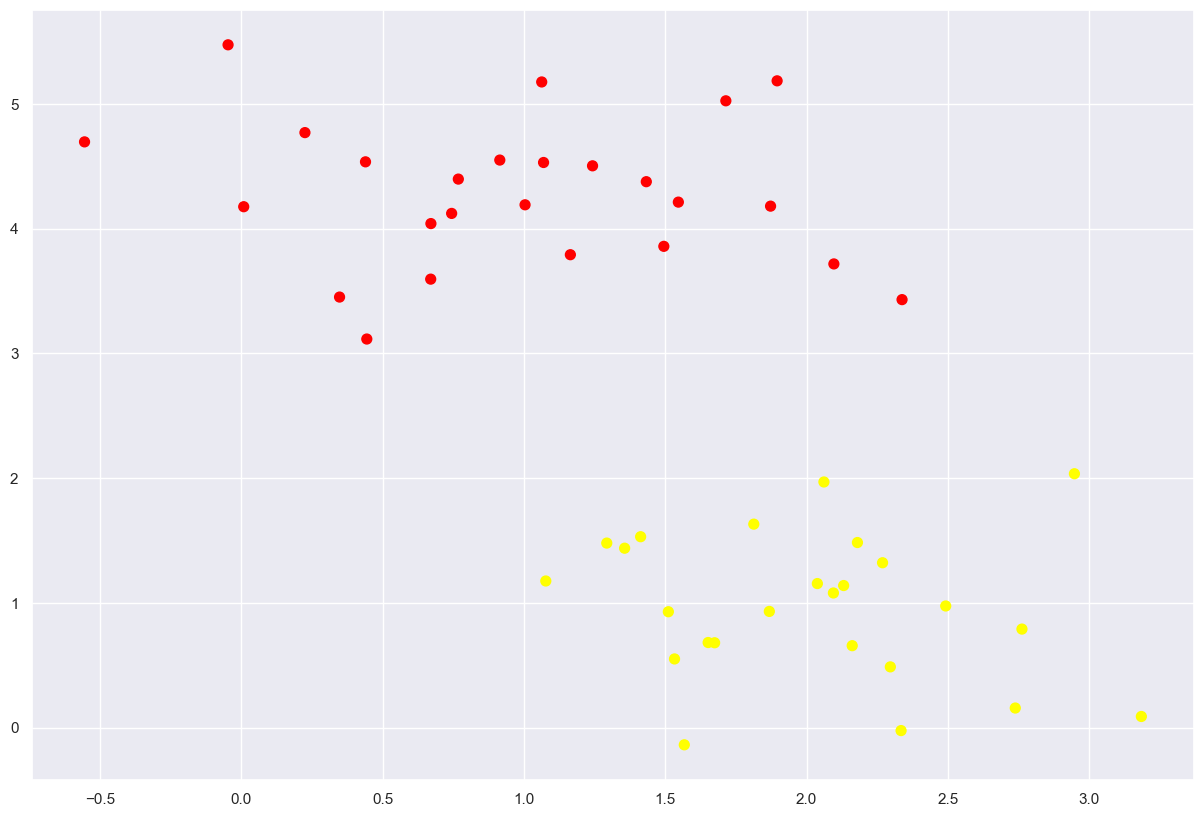

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

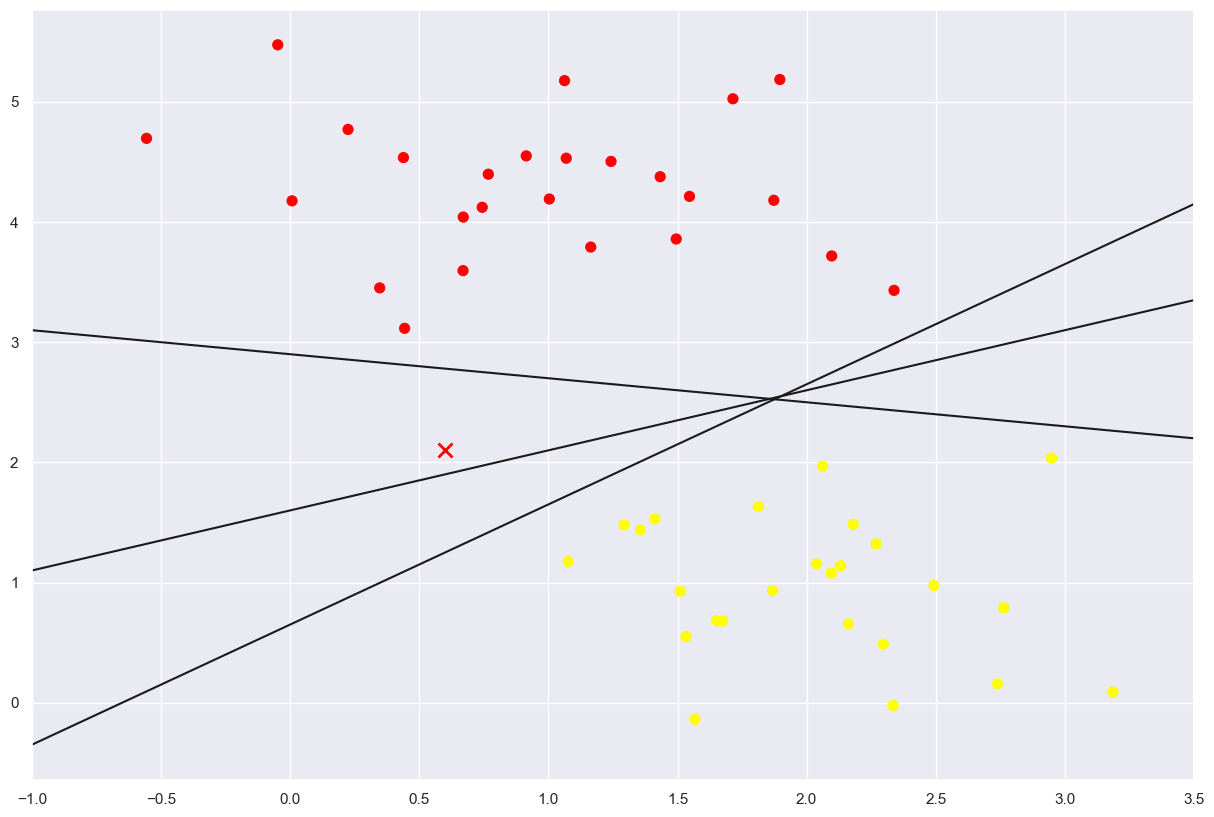

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

# Support Vector Machines: Maximizing the Margin

(-1.0, 3.5)

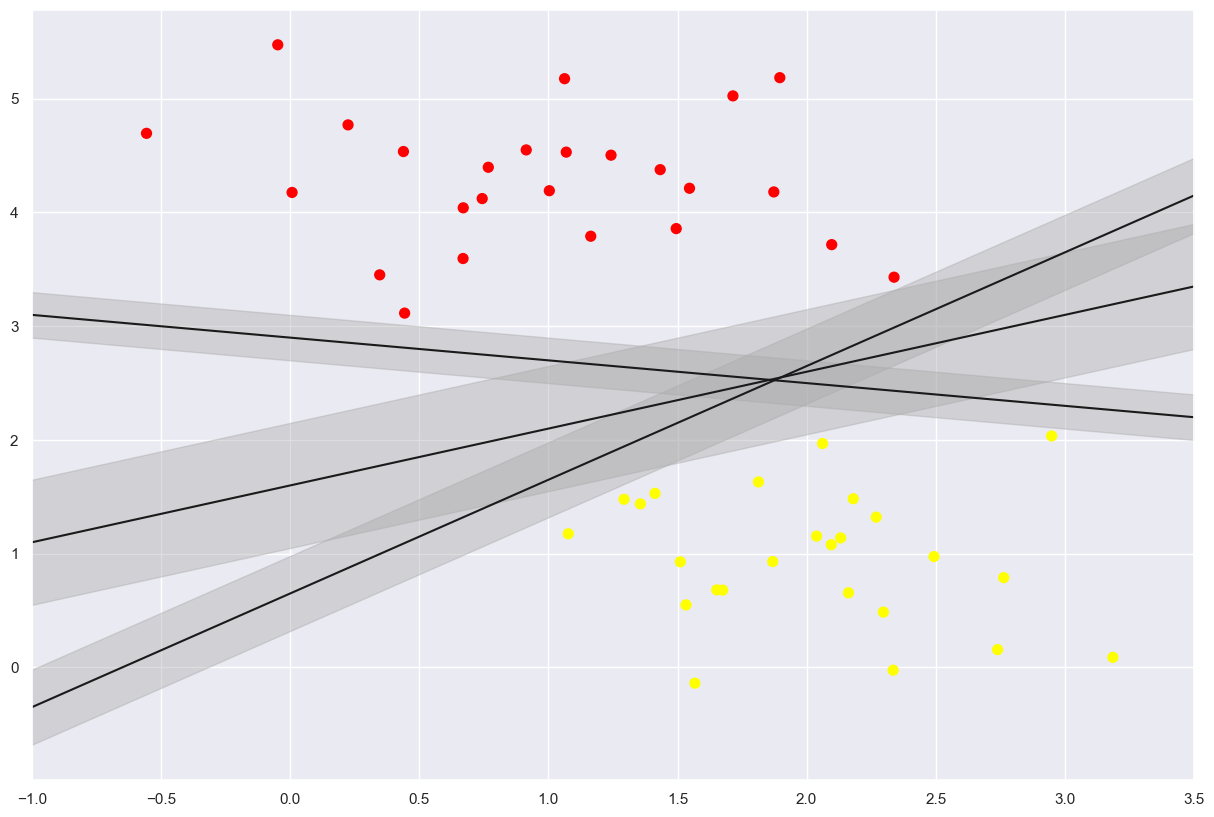

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [8]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

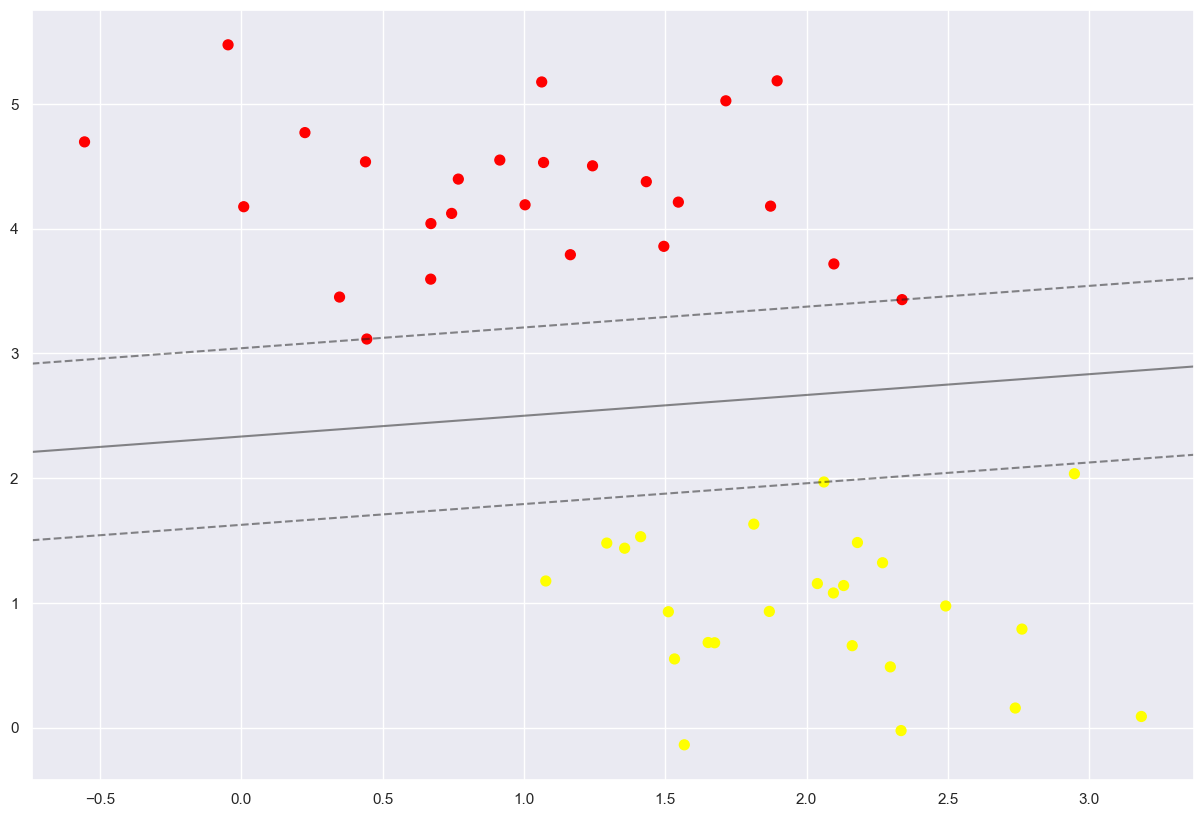

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [11]:
model.support_vectors_


array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

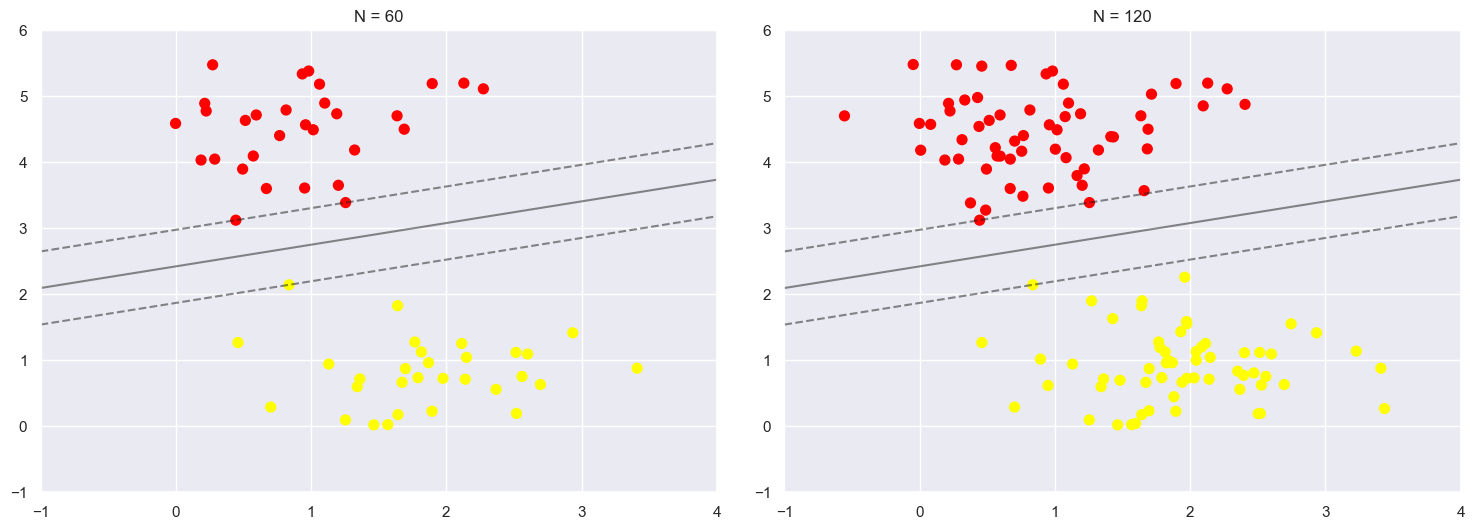

In [12]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50,marker='o', cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [13]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

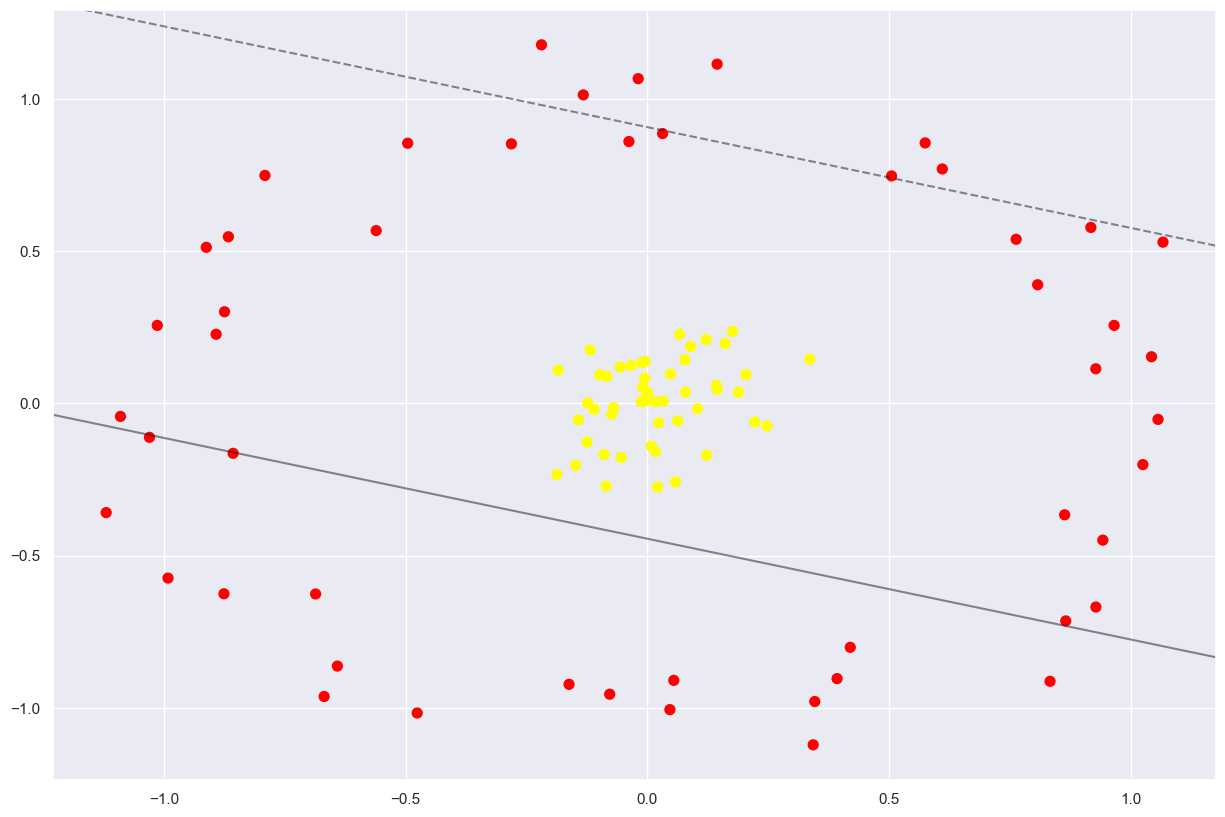

In [14]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [15]:
X

array([[-1.11942968e+00, -3.58319498e-01],
       [ 9.27523241e-01,  1.13836831e-01],
       [ 1.42442575e-01,  5.95349364e-02],
       [-4.95753827e-01,  8.54317399e-01],
       [-1.32560368e-01,  1.01297997e+00],
       [ 9.65416946e-01,  2.56174060e-01],
       [-1.61968309e-01, -9.22157979e-01],
       [ 2.47560509e-01, -7.34731012e-02],
       [ 8.97519112e-02,  1.86961223e-01],
       [ 8.65410687e-01, -7.13921703e-01],
       [ 3.30563757e-02,  7.33230713e-03],
       [ 2.35044085e-02, -6.36443280e-02],
       [ 7.76760147e-02,  1.43589398e-01],
       [-3.39151284e-02,  1.24995931e-01],
       [-8.91954653e-01,  2.27101984e-01],
       [ 7.90545264e-02,  3.67238265e-02],
       [-6.86191229e-01, -6.25500458e-01],
       [-8.75829681e-01, -6.24921570e-01],
       [-3.61413813e-03,  7.33785405e-03],
       [ 5.83707061e-02, -2.57789030e-01],
       [-6.97695573e-02, -1.36534584e-02],
       [ 1.21582102e-01,  2.09851948e-01],
       [ 1.22584531e-01, -1.69928321e-01],
       [ 1.

In [16]:
1.06909564e-01**2 +  1.09777740e+00**2

1.2165448748254302

In [17]:
(X ** 2).sum(1)

array([1.38151567e+00, 8.73258187e-01, 2.38342959e-02, 9.75630076e-01,
       1.04370066e+00, 9.97655028e-01, 8.76609071e-01, 6.66845021e-02,
       4.30099043e-02, 1.25861986e+00, 1.14648671e-03, 4.60305770e-03,
       2.66514785e-02, 1.67742187e-02, 8.47158414e-01, 7.59825758e-03,
       8.62109227e-01, 1.15760460e+00, 6.69060965e-05, 6.98623232e-02,
       5.05420805e-03, 5.88200475e-02, 4.39026016e-02, 1.09075674e+00,
       2.95637656e-03, 1.33910538e-01, 8.12991028e-01, 2.53231426e-02,
       8.03496349e-01, 3.68951248e-02, 7.40674689e-01, 1.09508056e+00,
       1.37359798e+00, 7.61112430e-01, 1.41782717e+00, 6.36574726e-01,
       1.09534736e-03, 2.32328741e-02, 1.52591874e+00, 1.01259398e+00,
       1.91345169e-02, 3.43392917e-02, 6.65976949e-03, 1.25939637e+00,
       8.78704611e-01, 8.29603766e-01, 1.48295609e-02, 1.37273910e+00,
       2.08813753e-04, 1.07308660e+00, 8.17194250e-01, 7.56204112e-02,
       1.17529707e+00, 1.26153258e+00, 6.90057821e-03, 8.71453748e-02,
      

In [18]:
r = np.exp(-(X ** 2).sum(1))


In [19]:
np.exp(-1.216)

0.2964134525853191

In [20]:
r

array([0.25119753, 0.41758875, 0.9764475 , 0.37695477, 0.35214908,
       0.36874312, 0.4161918 , 0.9354903 , 0.9579019 , 0.28404578,
       0.99885417, 0.99540752, 0.97370054, 0.98336569, 0.4286312 ,
       0.99243054, 0.42227048, 0.31423801, 0.9999331 , 0.9325222 ,
       0.99495854, 0.94287643, 0.95704717, 0.33596216, 0.99704799,
       0.87466831, 0.44352947, 0.9749948 , 0.4477607 , 0.96377721,
       0.47679212, 0.33451266, 0.25319433, 0.46714647, 0.24223979,
       0.52910164, 0.99890525, 0.97703493, 0.21742121, 0.36327543,
       0.98104739, 0.96624361, 0.99336236, 0.2838253 , 0.41532057,
       0.4362221 , 0.98527986, 0.25341189, 0.99979121, 0.34195142,
       0.44166913, 0.92716808, 0.30872725, 0.28321964, 0.99312318,
       0.91654384, 0.31519363, 0.41798244, 0.98220811, 0.37901833,
       0.44693857, 0.92220872, 0.32926185, 0.98899661, 0.98844842,
       0.95519667, 0.32066279, 0.99281009, 0.95079292, 0.91462746,
       0.98161445, 0.26931523, 0.34586454, 0.39966192, 0.94814

In [21]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

Text(0.5, 0, 'r')

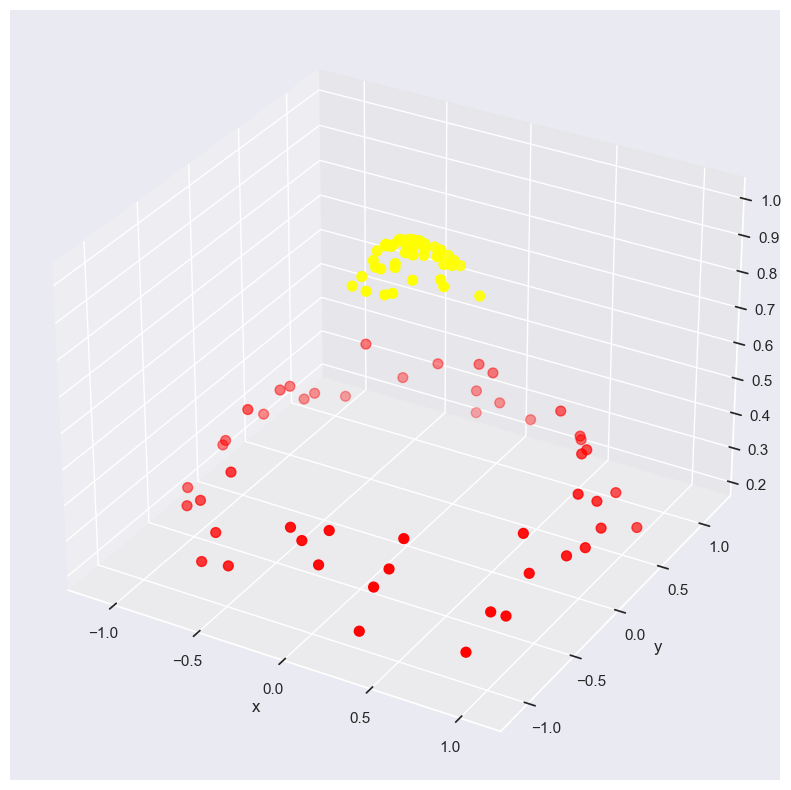

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [23]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [24]:
clf.support_vectors_


array([[-0.68619123, -0.62550046],
       [ 0.50515732,  0.74686485],
       [ 0.8072498 ,  0.3896718 ],
       [-0.03818146,  0.85977722],
       [-0.8569112 , -0.16375477],
       [-0.5609088 ,  0.56741171],
       [ 0.86313925, -0.3656436 ],
       [ 0.05466536, -0.90918396],
       [ 0.41968549, -0.80066119],
       [ 0.33584144,  0.14533087],
       [-0.18700944, -0.23295045]])

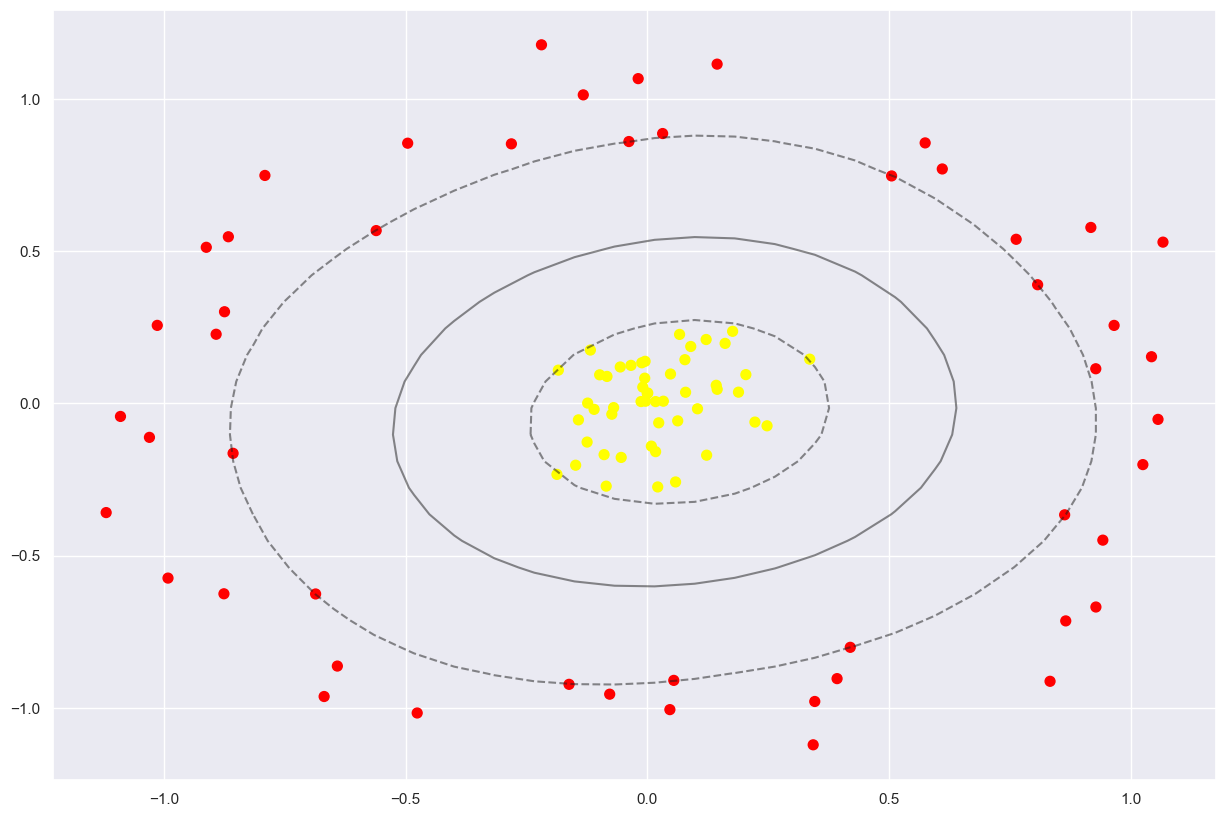

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

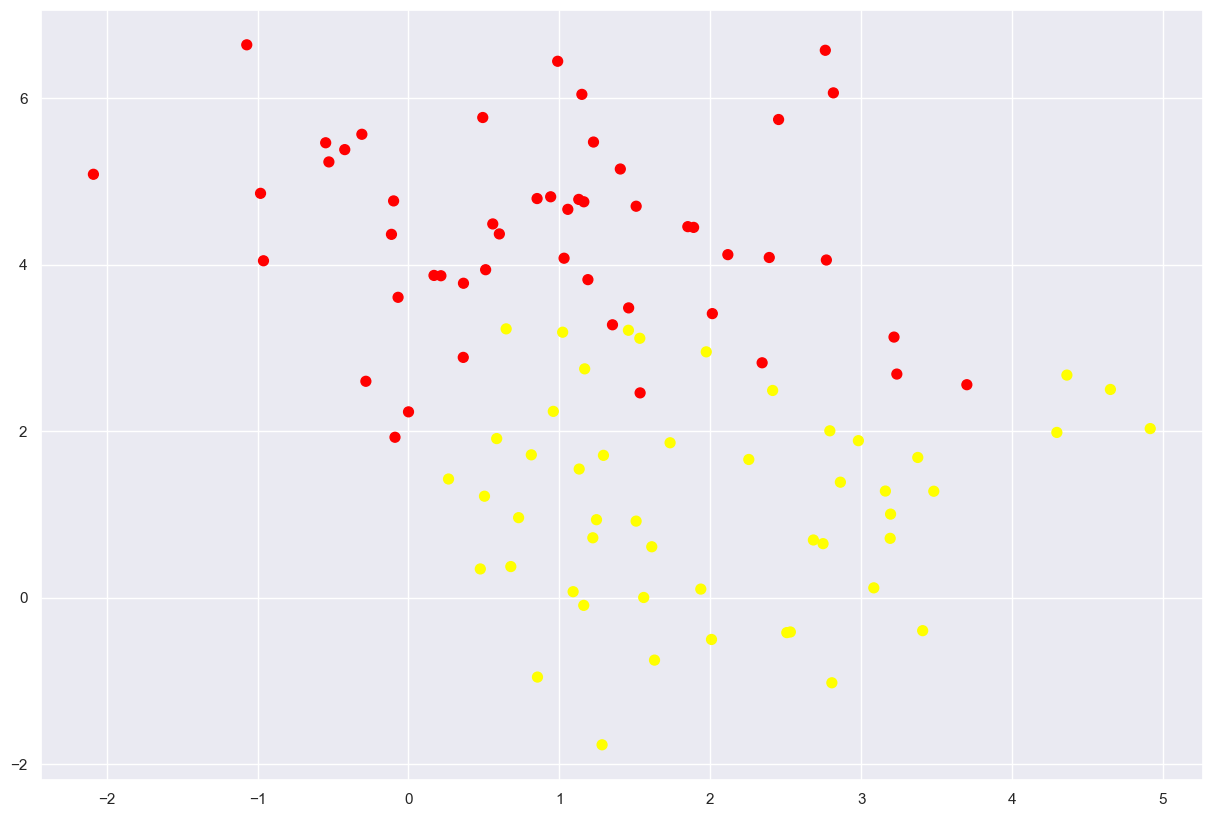

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

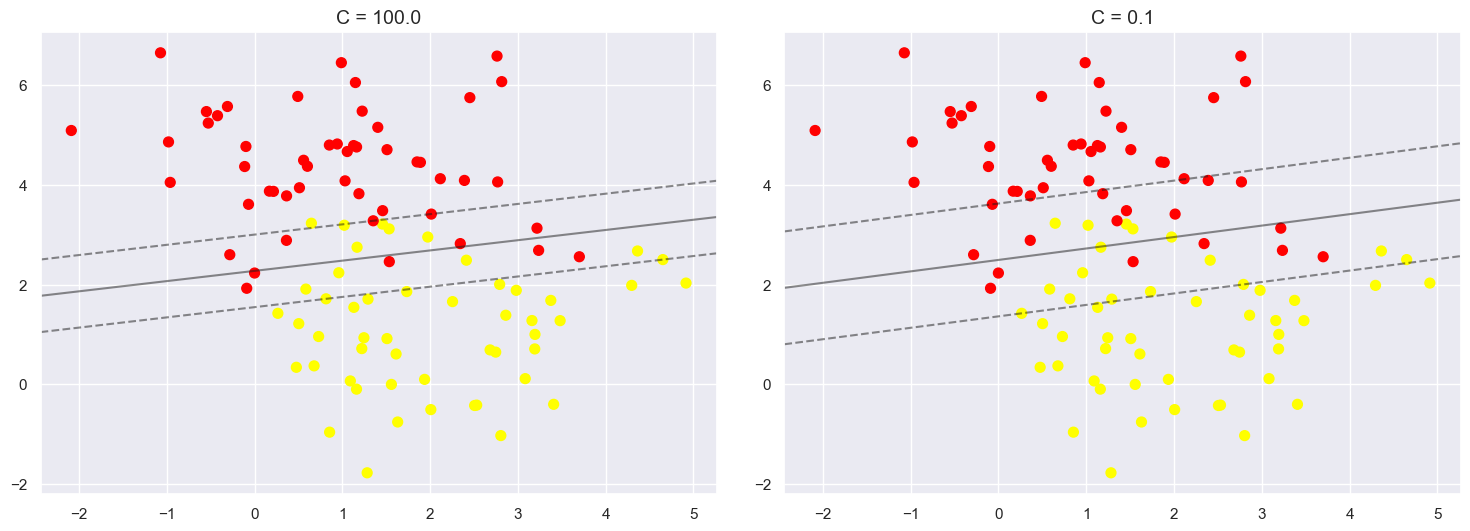

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [28]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

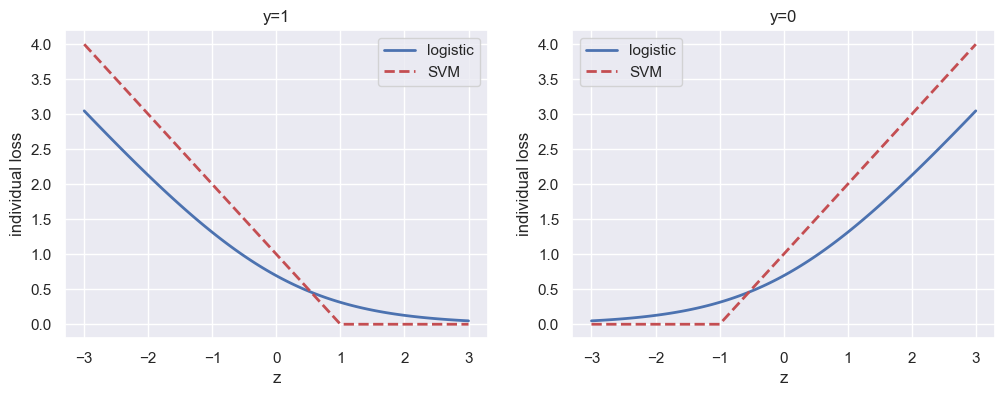

In [29]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')
ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')
ax[0].set_title('y=1')
ax[1].set_title('y=0')
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()